### Data Retrieval and EDA for Zillow Housing Data

This notebook performs the following tasks

- Retrieve and overview housing data from Zillow
- split data into train and test sets
- transform data into long formats

In [1]:
#import relevant libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import functions as fn

##### Data source: https://www.zillow.com/research/data/
Upon arrival at the page, navigate to the “Home Values” Section. From the “Data Type” dropdown select “ZHVI Single-Family Home Time Series” and from the “Geography” dropdown select “Zip Code”. At time of writing the lastest month in the data is 2019-07.

In [2]:
#make sure path is set to file directory
zillow_updated_df = pd.read_csv('Zip_Zhvi_SingleFamilyResidence.csv', encoding='ISO-8859-1')

In [3]:
zillow_updated_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,337200.0,338200.0,339000.0,...,1050700,1049700,1050800,1055800,1061200,1070000,1083000,1086000,1072000,1056500
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,210400.0,212200.0,212200.0,...,336700,335900,336000,335600,334200,333400,333500,333500,331800,330100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,502900.0,504900.0,506300.0,...,1319300,1320800,1325400,1331900,1338800,1345000,1351100,1349700,1337100,1323500
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,95400.0,95600.0,95800.0,...,179300,180200,181000,182100,183400,183100,182000,181800,183300,184300
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,77300.0,77300.0,77300.0,...,126400,126900,127600,128200,128600,128900,128700,128500,129000,129800


In [4]:
#15752 total zipcodes in data
#time period start from 1996-04 to 2019-07
zillow_updated_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15752 entries, 0 to 15751
Columns: 287 entries, RegionID to 2019-07
dtypes: float64(231), int64(52), object(4)
memory usage: 34.5+ MB


In [5]:
#retrieve columns with only descriptive information
cols_info = zillow_updated_df.columns[:7]
cols_info

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank'],
      dtype='object')

In [6]:
#transform data into long format and aggregate zipcodes by mean
melt_df = fn.df_melt(zillow_updated_df, cols_info)
melt_df = melt_df.dropna(subset=['value'])
agg_df = melt_df.groupby('time').aggregate({'value':'mean'})

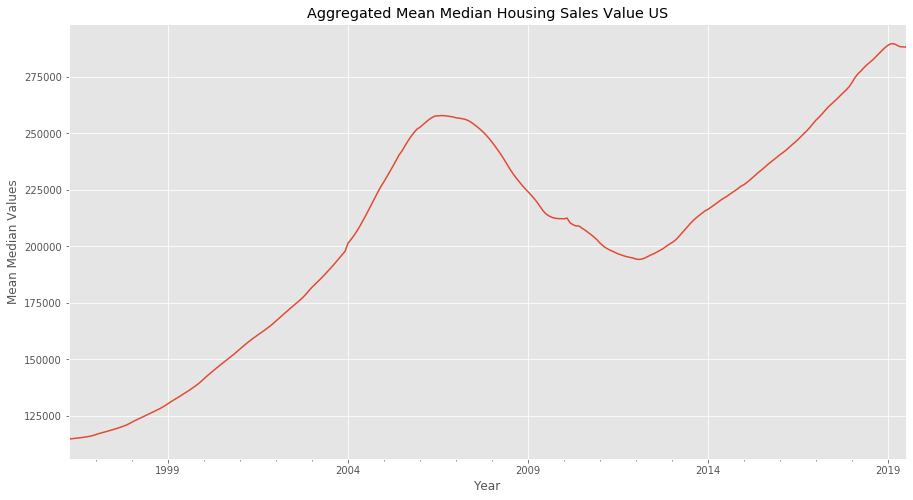

In [7]:
#plot aggregate data over time
agg_df.plot(figsize=(15,8), legend=False)
plt.title("Aggregated Mean Median Housing Sales Value US")
plt.ylabel("Mean Median Values")
plt.xlabel("Year")
plt.show()

In [8]:
#checking for nulls in columns, 
#some date columns are NaN indicating no complete historical values for certain zipcodes
zillow_updated_df[zillow_updated_df.isnull().any(axis=1)].head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
18,62012,11201,New York,NY,New York-Newark-Jersey City,Kings County,19,NaN,NaN,NaN,...,4726000,4633300,4586500,4511500,4429700,4405500,4415800,4433400,4478600,4519600
23,61625,10011,New York,NY,New York-Newark-Jersey City,New York County,24,NaN,NaN,NaN,...,10695700,10286900,10185000,10100400,10032400,10006800,9961100,9790400,9558700,9409000
40,61796,10456,New York,NY,New York-Newark-Jersey City,Bronx County,41,NaN,NaN,NaN,...,422700,435900,445300,445800,446200,445900,437600,432000,433000,431000
96,84613,60611,Chicago,IL,Chicago-Naperville-Elgin,Cook County,97,NaN,NaN,NaN,...,1509000,1518500,1535500,1539500,1538600,1534900,1523500,1507900,1498500,1499700
128,99142,97229,Portland,OR,Portland-Vancouver-Hillsboro,Multnomah County,129,NaN,NaN,NaN,...,572200,575500,581400,585800,585000,581900,579800,579200,579100,578900


Decision was made to use data from 2012-01 to 2018-06 as training data for time series model, data from 2018-07 to 2019-7 are to be used as test data.  The code below creates dataframes based on the train/test split dates.

In [9]:
#all columns from 2012-01 and on
cols_2012 = zillow_updated_df.columns[196:]
cols_2012

Index(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
       '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
       '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
       '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
       '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
       '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
       '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
       '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
       '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
       '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
       '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06',
       '2018-07', '2018-08', '2018-09', '2018-10', 

In [10]:
#create data frame for all data since 2012-01
zillow_updated_2012_df = pd.merge(zillow_updated_df[cols_info], zillow_updated_df[cols_2012], 
                                  left_index=True, right_index=True)

In [11]:
zillow_updated_2012_df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,2012-01,2012-02,2012-03,...,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07
0,84654,60657,Chicago,IL,Chicago-Naperville-Elgin,Cook County,1,739600.0,735500.0,735700.0,...,1050700,1049700,1050800,1055800,1061200,1070000,1083000,1086000,1072000,1056500
1,91982,77494,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,2,248800.0,251600.0,252700.0,...,336700,335900,336000,335600,334200,333400,333500,333500,331800,330100
2,84616,60614,Chicago,IL,Chicago-Naperville-Elgin,Cook County,3,931300.0,926300.0,927600.0,...,1319300,1320800,1325400,1331900,1338800,1345000,1351100,1349700,1337100,1323500
3,91940,77449,Katy,TX,Houston-The Woodlands-Sugar Land,Harris County,4,116000.0,115900.0,115800.0,...,179300,180200,181000,182100,183400,183100,182000,181800,183300,184300
4,93144,79936,El Paso,TX,El Paso,El Paso County,5,112400.0,112200.0,112300.0,...,126400,126900,127600,128200,128600,128900,128700,128500,129000,129800


In [12]:
#fill missing metro area data
zillow_updated_2012_df['Metro'].fillna('N/S', inplace=True)

In [13]:
#split train_test split, 2012-01 to 2018-06 for train, 2018-07 to 2019-07
cols_train = zillow_updated_2012_df.columns[7:85]
cols_test = zillow_updated_2012_df.columns[85:]
cols_train, cols_test

(Index(['2012-01', '2012-02', '2012-03', '2012-04', '2012-05', '2012-06',
        '2012-07', '2012-08', '2012-09', '2012-10', '2012-11', '2012-12',
        '2013-01', '2013-02', '2013-03', '2013-04', '2013-05', '2013-06',
        '2013-07', '2013-08', '2013-09', '2013-10', '2013-11', '2013-12',
        '2014-01', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06',
        '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12',
        '2015-01', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06',
        '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
        '2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06',
        '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12',
        '2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06',
        '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
        '2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06'],
       dtype='object'),
 Index(['2018

In [14]:
#subset dataframes by train and test
train_df = zillow_updated_2012_df[list(cols_info)+list(cols_train)]
test_df = zillow_updated_2012_df.drop(list(cols_train), axis=1)

In [15]:
#melt train and test data into long format
train_melt_df = fn.df_melt(train_df, id_cols=list(cols_info))
test_melt_df = fn.df_melt(test_df, id_cols=list(cols_info))

In [16]:
#save train and test dataset in long formats to pickles
with open('train.pickle', 'wb') as f:
    pickle.dump(train_melt_df, f, pickle.HIGHEST_PROTOCOL)
    
with open('test.pickle', 'wb') as f:
    pickle.dump(test_melt_df, f, pickle.HIGHEST_PROTOCOL)